### Carregando as Bibliotecas

In [2]:
! pip install lightgbm
! pip install xgboost

In [3]:
import plotly_express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import stats
import scipy
import seaborn as sns
import statsmodels
import statsmodels.stats.api as sms

In [4]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [5]:
# parâmetros dos gráficos para o arquivo
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
%matplotlib inline
plt.rcParams.update(params)

### Arquivo_EUA

In [6]:
df= pd.read_excel(r'dataset_mestre_EUA.xlsx')

In [7]:
df=df.fillna(0.001)

In [8]:
df.head(2)

,State,Urban Utility-scale PV (GWh),Urban Utility-scale PV (GW),Urban Utility-scale PV (km2),Rural Utility-scale PV (GWh),Rural Utility-scale PV (GW),Rural Utility-scale PV (km2),Rooftop PV (GWh),Rooftop PV (GW),CSP (GWh),...,Geothermal Hydrothermal (GW),EGS Geothermal (GWh),EGS Geothermal (GW),Hydropower (GWh),Hydropower (GW),Hydropower (Count of Sites),População_Estado_EUA,PIB_Estado_EUA (US$ Bi),Area_Estado_EUA(territ_seco_km2),Total_Eletricidade_EUA (MW.h)
0,Alabama,35850.628506,20.453177,426.10785,3.706839e+06,2114.792060,44058.167912,15475.968616,12.516076,0.0,...,0.00000,535489.50344,67.921043,4102.565755,0.936659,2435,4903185.0,228142.6,131171.0,142679433.0
1,Alaska,166.000000,0.112000,2.34880,8.282976e+06,9005.192669,187608.180600,0.001000,1.291509,0.0,...,1.95814,0.00100,0.001000,23675.571931,5.405382,3053,731545.0,54385.0,477953.0,6070843.0


In [9]:
# Retirar a linha Distrito de Colúmbia - avaliado como 'outlier'
df=df.drop(8)
df.head(10)

,State,Urban Utility-scale PV (GWh),Urban Utility-scale PV (GW),Urban Utility-scale PV (km2),Rural Utility-scale PV (GWh),Rural Utility-scale PV (GW),Rural Utility-scale PV (km2),Rooftop PV (GWh),Rooftop PV (GW),CSP (GWh),...,Geothermal Hydrothermal (GW),EGS Geothermal (GWh),EGS Geothermal (GW),Hydropower (GWh),Hydropower (GW),Hydropower (Count of Sites),População_Estado_EUA,PIB_Estado_EUA (US$ Bi),Area_Estado_EUA(territ_seco_km2),Total_Eletricidade_EUA (MW.h)
0,Alabama,35850.628506,20.453177,426.107850,3.706839e+06,2114.792060,44058.167912,15475.968616,12.516076,0.000000e+00,...,0.00000,5.354895e+05,67.921043,4102.565755,0.936659,2435,4903185.0,228142.6,131171.0,142679433.0
1,Alaska,166.000000,0.112000,2.348800,8.282976e+06,9005.192669,187608.180600,0.001000,1.291509,0.000000e+00,...,1.95814,1.000000e-03,0.001000,23675.571931,5.405382,3053,731545.0,54385.0,477953.0,6070843.0
2,Arizona,121305.877473,52.611054,1096.063625,1.186769e+07,5147.086733,107230.973604,22736.083217,14.879973,1.254433e+07,...,1.05640,1.239148e+06,157.172465,1303.222021,0.297539,1958,7278717.0,370119.0,294207.0,113551987.0
3,Arkansas,28960.881336,15.957316,332.444079,4.986389e+06,2747.477737,57239.119528,8484.950618,6.773149,0.000000e+00,...,0.00000,6.286217e+05,79.733850,6093.400569,1.391187,3268,3017825.0,130954.0,134771.0,64442898.0
4,California,246008.107935,111.403807,2320.912651,8.855917e+06,4010.367374,83549.320302,106411.151201,75.908383,8.490916e+06,...,16.60550,1.344179e+06,170.494600,30023.578287,6.854698,9692,39512223.0,3132800.0,403466.0,201784204.0
5,Colorado,43470.501437,19.167192,399.316500,1.023808e+07,4514.218007,94046.208484,16162.171470,11.796668,9.154524e+06,...,1.13540,1.251658e+06,158.759254,7789.128915,1.778340,5060,5758736.0,392986.0,268431.0,56337734.0
6,Connecticut,7716.647187,4.833023,100.687982,1.962775e+04,12.293079,256.105804,6616.198688,5.903443,0.000000e+00,...,0.00000,5.607844e+04,7.112942,922.457854,0.210607,659,3565287.0,287822.0,12542.0,40050038.0
7,Delaware,14856.468171,9.119547,189.990556,2.723326e+05,167.169615,3482.700320,2185.431677,1.875725,0.000000e+00,...,0.00000,2.281335e+04,2.893627,30.790340,0.007030,25,973764.0,77082.0,5047.0,5258538.0
9,Florida,72787.192615,39.850365,830.215942,5.137347e+06,2812.653444,58596.946748,63986.638865,49.406525,3.586872e+02,...,0.00000,3.741613e+05,47.458304,682.106477,0.155732,493,21477737.0,1106500.0,138887.0,245603485.0
10,Georgia,43166.817556,24.274358,505.715787,5.492183e+06,3088.465453,64343.030264,31116.369170,24.607276,0.000000e+00,...,0.00000,3.532065e+05,44.800414,1988.009884,0.453884,2100,10617423.0,625713.0,148959.0,128691569.0


In [10]:
# colunas - novos nomes
df = df.rename(columns = {"População_Estado_EUA":"pope", "PIB_Estado_EUA (US$ Bi)":"pibe","Area_Estado_EUA(territ_seco_km2)":"areae","Total_Eletricidade_EUA (MW.h)":"GWe"}, inplace = False)

In [11]:
df.head(2)

,State,Urban Utility-scale PV (GWh),Urban Utility-scale PV (GW),Urban Utility-scale PV (km2),Rural Utility-scale PV (GWh),Rural Utility-scale PV (GW),Rural Utility-scale PV (km2),Rooftop PV (GWh),Rooftop PV (GW),CSP (GWh),...,Geothermal Hydrothermal (GW),EGS Geothermal (GWh),EGS Geothermal (GW),Hydropower (GWh),Hydropower (GW),Hydropower (Count of Sites),pope,pibe,areae,GWe
0,Alabama,35850.628506,20.453177,426.10785,3.706839e+06,2114.792060,44058.167912,15475.968616,12.516076,0.0,...,0.00000,535489.50344,67.921043,4102.565755,0.936659,2435,4903185.0,228142.6,131171.0,142679433.0
1,Alaska,166.000000,0.112000,2.34880,8.282976e+06,9005.192669,187608.180600,0.001000,1.291509,0.0,...,1.95814,0.00100,0.001000,23675.571931,5.405382,3053,731545.0,54385.0,477953.0,6070843.0


### Definição de Metadados

In [12]:
df['pibe_capita'] = df['pibe']/df['pope']
df['pibe_areae'] = df['pibe']/df['areae']
df['pibe_GWe'] = df['pibe']/df['GWe']
df['pope_areae'] = df['pope']/df['areae']
df['GWe_pope'] = df['GWe']/df['pope']

In [13]:
df['solar_e']=df['Urban Utility-scale PV (GWh)'] + df['Rural Utility-scale PV (GWh)'] + df["Rooftop PV (GWh)"] 
df['eole']=df['Onshore Wind (GWh)']
df['bioSe']=df['Biopower-Solid (GWh)']
df['geoe']=df['Geothermal Hydrothermal (GWh)']+df['EGS Geothermal (GWh)']
df['hyde'] = df['Hydropower (GWh)']
dfe=df[["State",'pibe_capita','pibe_areae','pope_areae','pibe_GWe','GWe_pope','solar_e','eole','bioSe','geoe','hyde']]
dff=df[['State','solar_e','eole','bioSe','geoe','hyde']] # dataset somente com as variáveis de saída - y

In [14]:
# Preparação dos arquivos de entrada (X) e saída (y)
X = dfe.drop(columns=['solar_e','eole','bioSe','geoe','hyde','State'])
ysol = dfe.loc[:,'solar_e']
yeol = dfe.loc[:,'eole']
ybio = dfe.loc[:,'bioSe']
ygeo = dfe.loc[:,'geoe']
yhyd = dfe.loc[:,'hyde']
X= pd.read_excel(r'X.xlsx')
#X.to_excel (r'C:\Users\Acer\Documents\Data Science\Ciencia_Dados_POLI\Gestão de Energia\X.xlsx', index = False, header=True)
ysol.to_excel (r'C:\Users\Acer\Documents\Data Science\Ciencia_Dados_POLI\Gestão de Energia\ysol.xlsx', index = False, header=True)
yeol.to_excel (r'C:\Users\Acer\Documents\Data Science\Ciencia_Dados_POLI\Gestão de Energia\ysol.xlsx', index = False, header=True)
ybio.to_excel (r'C:\Users\Acer\Documents\Data Science\Ciencia_Dados_POLI\Gestão de Energia\ysol.xlsx', index = False, header=True)
ygeo.to_excel (r'C:\Users\Acer\Documents\Data Science\Ciencia_Dados_POLI\Gestão de Energia\ysol.xlsx', index = False, header=True)
yhyd.to_excel (r'C:\Users\Acer\Documents\Data Science\Ciencia_Dados_POLI\Gestão de Energia\ysol.xlsx', index = False, header=True)

In [15]:
X.head()

,pibe_capita,pibe_areae,pope_areae,pibe_GWe,GWe_pope
0,0.046529,1.739276,37.380099,0.001599,29.099337
1,0.074343,0.113787,1.530579,0.008958,8.298660
2,0.050849,1.258022,24.740122,0.003259,15.600550
3,0.043394,0.971678,22.392243,0.002032,21.354087
4,0.079287,7.764719,97.931977,0.015525,5.106881


In [16]:
X.describe()

,pibe_capita,pibe_areae,pope_areae,pibe_GWe,GWe_pope
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.087754,5.102354,76.803469,0.025532,15.544688
std,0.144220,7.307814,102.463331,0.139263,11.941289
min,0.038967,0.113787,1.000000,0.000959,1.000000
25%,0.053634,0.985839,16.896336,0.003336,10.024537
50%,0.060012,2.106112,41.509354,0.004574,12.754325
75%,0.069040,5.600267,84.283663,0.007081,17.677435
max,1.000000,33.327191,466.330131,1.000000,72.820735


In [38]:
# Normalização dos dados de entrada X -- EUA
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#df2 = scaler.fit_transform(X)
#df2 = pd.DataFrame(df2)
#df2.columns = ['pibe_capita', 'pibe_areae', 'pope_areae', 'pibe_GWe', 'GWe_pope']
#df2.describe()

In [39]:
#df2.head(2)

In [18]:
#dfe.head()

In [19]:
X = dfe.drop(columns=['solar_e','eole','bioSe','geoe','hyde','State'])
ygeo = dfe.loc[:,'geoe']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, ygeo, test_size=0.3, random_state=42)

### Primeiro caso - Geotérmica

In [21]:
# Divisão entre arquivos de treino e teste, com corte em 30%
X_train, X_test, y_train, y_test = train_test_split(X, ygeo,test_size =0.3, random_state=1234)

In [22]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(n_estimators=100)
model.fit(X_train, y_train)

ExtraTreesRegressor()

<AxesSubplot:>

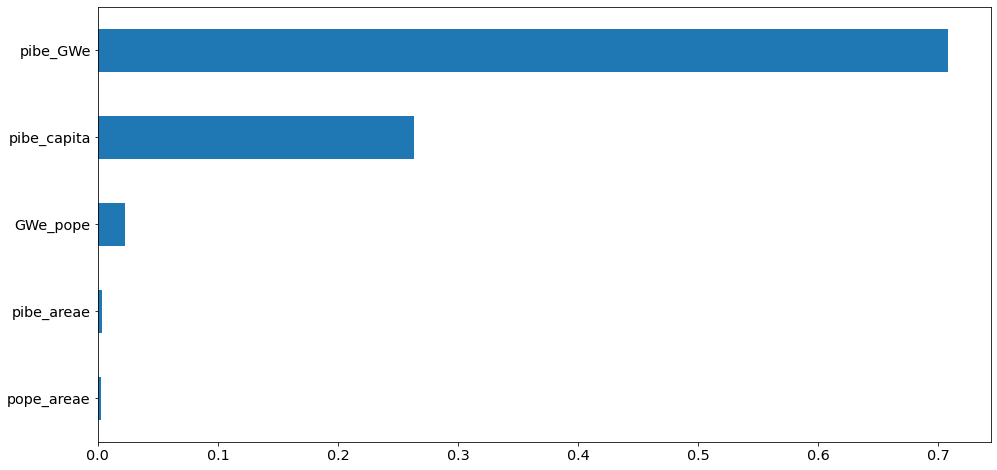

In [23]:
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(10).sort_values().plot.barh())

### Algoritmo Referência = Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [25]:
params_grid= {'n_estimators':[2,3,4,5,6,7,8,9,10],
              "max_features":['auto'],
              'max_depth':[10,20,30],
              'max_leaf_nodes':[2,3,4,5],
              'min_samples_leaf':[5,10,15],
              'min_samples_split':[3,6,9,12,15,18,21]}
random_rf = RandomizedSearchCV(estimator = rf,cv=10,param_distributions=params_grid,n_iter=100,verbose=2,n_jobs=-1)
random_rf.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    5.9s finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'max_features': ['auto'],
                                        'max_leaf_nodes': [2, 3, 4, 5],
                                        'min_samples_leaf': [5, 10, 15],
                                        'min_samples_split': [3, 6, 9, 12, 15,
                                                              18, 21],
                                        'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9,
                                                         10]},
                   verbose=2)

In [26]:
random_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 21,
 'min_samples_leaf': 5,
 'max_leaf_nodes': 5,
 'max_features': 'auto',
 'max_depth': 20}

In [30]:
m_rf=RandomForestRegressor(n_estimators= 10,
 min_samples_split = 21,
 min_samples_leaf = 5,
 max_leaf_nodes = 2,
 max_features ='auto',
 max_depth = 20)

In [31]:
yrf = m_rf.fit(X_train,y_train)
print(yrf)

RandomForestRegressor(max_depth=20, max_leaf_nodes=2, min_samples_leaf=5,
                      min_samples_split=21, n_estimators=10)


In [32]:
y_rf= yrf.predict(X_test)

### Avaliação dos Erros_Geotérmica

In [33]:
# https://medium.com/turing-talks/como-avaliar-seu-modelo-de-regress%C3%A3o-c2c8d73dab96#:~:text=Erro%20Quadr%C3%A1tico%20M%C3%A9dio%20(MSE)&text=Em%20outras%20palavras%2C%20pega%2Dse,esse%20n%C3%BAmero%2C%20pior%20o%20modelo.

In [34]:
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error # MSE
# RMSE = mean_squared_error(y_test,y_pred,squared=False) 
from sklearn.metrics import mean_absolute_error
import numpy as np
# MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
from sklearn.metrics import mean_squared_log_error

In [35]:
c=np.mean(y_train)
print(round(c,3))

1576837.033


In [36]:
R2 = r2_score(y_test,y_rf)
mse_rf = mean_squared_error(y_test, y_rf)
rmse_rf = mse_rf**0.5
mae_rf =  mean_absolute_error(y_test, y_rf)
# msle_rf = mean_squared_log_error(y_test,y_rf)
print('R2 =', round(R2,3))
print('MSE =', round(mse_rf,3))
print('RMSE =', round(rmse_rf,3))
print('MAE = ', round(mae_rf,3))
# print('MSLE =', round(msle_rf,3))

R2 = -2.531
MSE = 558349355816.151
RMSE = 747227.78
MAE =  571396.373


In [37]:
# R2 ajustado -- ponderação entre os fatores mais relevantes
def adjusted_r2(y_test, y_rf,X_train):
    from sklearn.metrics import r2_score
    adj_r2 = (1 - ((1 - r2_score(y_test, y_rf)) * (len(y_test) - 1)) / 
          (len(y_test) - X_train.shape[1] - 1))
    return adj_r2
a= round(adjusted_r2(y_test,y_rf,X_train),3)
print(a)

-4.297


In [38]:
errop2= (y_test - y_rf)*100/y_test
# em porcentagem
media = round(np.mean(errop2),1)
print(media)
desvio = round(np.std(errop2),1)
print(desvio)

-480.1
1025.7


In [39]:
a = np.mean(y_train)
print(round(a,3))

1576837.033


In [40]:
# Modelo de comparação simples - array com o valor médio de y_train
a = [0.123, 0.123,0.123, 0.123,0.123, 0.123,0.123, 0.123,0.123, 0.123,0.123, 0.123,0.123, 0.123,0.123, 0.123]
a = np.array(a)

In [41]:
a = [0.123]
a = a*16
print(a)

[0.123, 0.123, 0.123, 0.123, 0.123, 0.123, 0.123, 0.123, 0.123, 0.123, 0.123, 0.123, 0.123, 0.123, 0.123, 0.123]


In [42]:
# novo erro: modelo simples, com a média do conjunto treino
mse_m = mean_squared_error(y_test,a)
# comparativo entre o modelo tree e o modelo simples
r_rf = mse_rf/mse_m
print(round(mse_m,3), round(mse_rf,3))
print(round(r_rf,3))

414542961978.675 558349355816.151
1.347


### Uso inicial dos algoritmos GBoosting

### Otimização de parâmetros

In [43]:
# Light & XG Boosting
params= {
    'booster': ["gbtree","gblinear",'dart'],
    'learning rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
    'max depth': [3,4,5,8,10,11,12],
    'min_child_weigth': [1,3,5,7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree': [0.3,0.4,0.5,0.6]
}

In [44]:
# Gradient Boosting
params0= {
    'min_samples_split': [300,400,500],
    'min_samples_leaf': [30,40,50],
    'min_weight_fraction_leaf': [0, 0.1, 0.2, 0.3, 0.4],
    'max_depth': [5,6,7,8],
    'subsample': [0.6,0.7,0.8],
    'learning_rate' : [0.09, 0.1, 0.15]
}

In [45]:
# Adaptative Boosting
params1= {
    'n_estimators': [30,40,50],
    'learning_rate' : [0.09, 0.1, 0.15]
}

In [46]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)
import lightgbm as lgb
lgb = lgb.LGBMRegressor(learning_rate = 0.001, 
                              num_leaves = 65,  
                              n_estimators = 100)                       
lgb.fit(X_train, y_train)
 # XGBoost
import xgboost as xgb
xgb= xgb.XGBRegressor(learning_rate=0.001,
                            max_depth = 1, 
                            n_estimators = 100)
xgb.fit(X_train, y_train)
# AdaBoost
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=1), n_estimators=100,
    learning_rate=0.001)
ada.fit(X_train, y_train)

print('*****************ClassifiersDone*****************')

*****************ClassifiersDone*****************


In [47]:
# Random Search & Cross Validation
random_search_gbr = RandomizedSearchCV(gbr,param_distributions=params0,n_iter=5,n_jobs=-1,cv=5,verbose=3)
random_search_lgb = RandomizedSearchCV(lgb,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=3)
random_search_xgb = RandomizedSearchCV(xgb,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=3)
random_search_ada = RandomizedSearchCV(ada,param_distributions=params1,n_iter=5,n_jobs=-1,cv=5,verbose=3)

In [48]:
random_search_gbr.fit(X_train, y_train)
random_search_lgb.fit(X_train, y_train)
random_search_xgb.fit(X_train, y_train)
random_search_ada.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[19:33:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, learning rate, max depth, max_delta_step, max_depth, min_child_weight, min_child_weigth, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.2s finished


RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1),
                                               learning_rate=0.001,
                                               n_estimators=100),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'learning_rate': [0.09, 0.1, 0.15],
                                        'n_estimators': [30, 40, 50]},
                   verbose=3)

In [49]:
from sklearn.model_selection import cross_val_score
score_gbr=cross_val_score(gbr,X,ysol,cv=10)
score_lgb=cross_val_score(lgb,X,ysol,cv=10)
score_xgb=cross_val_score(xgb,X,ysol,cv=10)
score_ada=cross_val_score(ada,X,ysol,cv=10)

### Gradient Boosting

In [50]:
print(random_search_gbr.best_estimator_)

GradientBoostingRegressor(learning_rate=0.15, max_depth=7, min_samples_leaf=30,
                          min_samples_split=500, min_weight_fraction_leaf=0.2,
                          random_state=0, subsample=0.6)


In [51]:
m_gbr = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.001, loss='ls', max_depth= 7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=50, min_samples_split=400,
                          min_weight_fraction_leaf=0.2, n_estimators=500,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=0.8, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [52]:
m_gbr.fit(X_train,y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:309: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  FutureWarning)


GradientBoostingRegressor(learning_rate=0.001, max_depth=7, min_samples_leaf=50,
                          min_samples_split=400, min_weight_fraction_leaf=0.2,
                          n_estimators=500, presort='auto', random_state=0,
                          subsample=0.8)

In [53]:
y_gbr = m_gbr.predict(X_test)

In [54]:
mse_gbr = round(mean_squared_error(y_test, y_gbr),3)
print(mse_gbr)

1319884720444.6


In [55]:
errop2= (y_test - y_gbr)*100/y_test
a = np.mean(errop2)
print(round(a,3))
# em porcentagem

-734.781


In [56]:
R2 = r2_score(y_test,y_gbr)
mse_gbr = mean_squared_error(y_test, y_gbr)
rmse_gbr = mse_gbr**0.5
mae_gbr =  mean_absolute_error(y_test, y_gbr)
# msle_rf = mean_squared_log_error(y_test,y_rf)
print('R2 =', round(R2,3))
print('MSE =', round(mse_gbr,3))
print('RMSE =', round(rmse_gbr,3))
print('MAE = ', round(mae_gbr,3))
# print('MSLE =', round(msle_rf,3))

R2 = -7.348
MSE = 1319884720444.6
RMSE = 1148862.359
MAE =  1077853.227


In [57]:
def adjusted_r2(y_test, y_gbr,X_train):
    from sklearn.metrics import r2_score
    adj_r2 = (1 - ((1 - r2_score(y_test, y_gbr)) * (len(y_test) - 1)) / 
          (len(y_test) - X_train.shape[1] - 1))
    return adj_r2
a= round(adjusted_r2(y_test,y_gbr,X_train),3)
print(a)

-11.521


In [58]:
# Modelo de comparação simples - array com o valor médio de y_train
a = [0.123, 0.123,0.123, 0.123,0.123, 0.123,0.123, 0.123,0.123, 0.123,0.123, 0.123,0.123, 0.123,0.123, 0.123]
a = np.array(a)

a = [0.123]
a = a*16
print(a)

[0.123, 0.123, 0.123, 0.123, 0.123, 0.123, 0.123, 0.123, 0.123, 0.123, 0.123, 0.123, 0.123, 0.123, 0.123, 0.123]


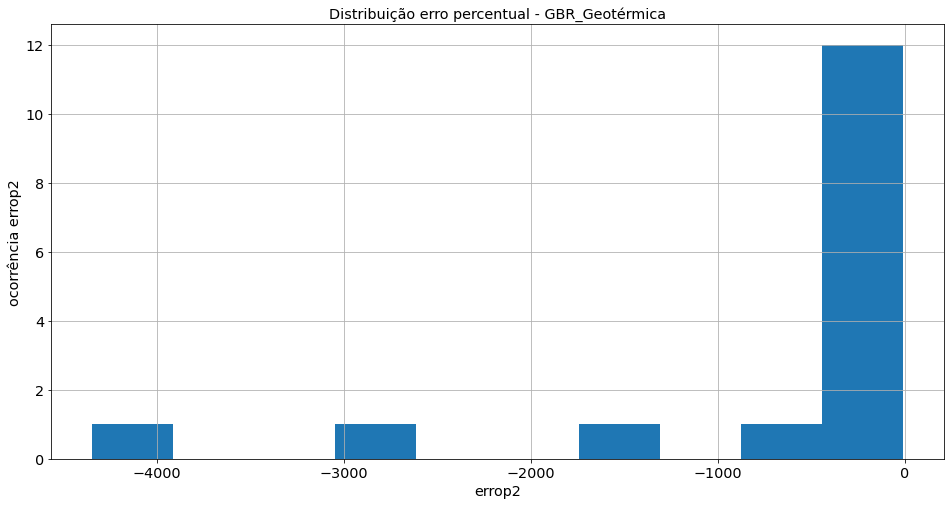

In [59]:
errop2.hist()
plt.title("Distribuição erro percentual - GBR_Geotérmica")
plt.xlabel("errop2")
plt.ylabel("ocorrência errop2")
plt.show()

In [60]:
# novo erro: modelo simples, com a média do conjunto treino
mse_m = mean_squared_error(y_test,a)
# comparativo entre o modelo tree e o modelo simples
r_gbr = mse_gbr/mse_m
print(round(mse_m,3), round(mse_gbr,3))
print(round(r_gbr,3))

414542961978.675 1319884720444.6
3.184


### Light Gradient Boosting

In [61]:
print(random_search_lgb.best_estimator_)

LGBMRegressor(booster='gblinear', colsample_bytree=0.6, gamma=0.2,
              learning rate=0.2, learning_rate=0.001, max depth=10,
              min_child_weigth=7, num_leaves=65)


In [62]:
from lightgbm import LGBMRegressor
m_lgb = LGBMRegressor(booster='gblinear', boosting_type='gbdt', class_weight=None,
              colsample_bytree=0.4, gamma=0.4, importance_type='split',
              learning_rate=1.0, max_depth=12,
              min_child_samples=20, min_child_weight=7,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=65,
              objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [63]:
m_lgb.fit(X_train,y_train)

[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: gamma


LGBMRegressor(booster='gblinear', colsample_bytree=0.4, gamma=0.4,
              learning_rate=1.0, max_depth=12, min_child_weight=7,
              num_leaves=65)

In [64]:
y_lgb = m_lgb.predict(X_test)

In [65]:
mse_lgb = round(mean_squared_error(y_test, y_lgb),3)
print(mse_lgb)

1303984298869.707


In [66]:
errop2= (y_test - y_lgb)*100/y_test
# em porcentagem

In [67]:
a = [0.123]
a = a*16
print(a)

[0.123, 0.123, 0.123, 0.123, 0.123, 0.123, 0.123, 0.123, 0.123, 0.123, 0.123, 0.123, 0.123, 0.123, 0.123, 0.123]


In [68]:
# novo erro: modelo simples, com a média do conjunto treino
mse_m = mean_squared_error(y_test,a)
# comparativo entre o modelo tree e o modelo simples
r_lgb = mse_lgb/mse_m
print(round(mse_m,3), round(mse_lgb,3))
print(round(r_lgb,3))

414542961978.675 1303984298869.707
3.146


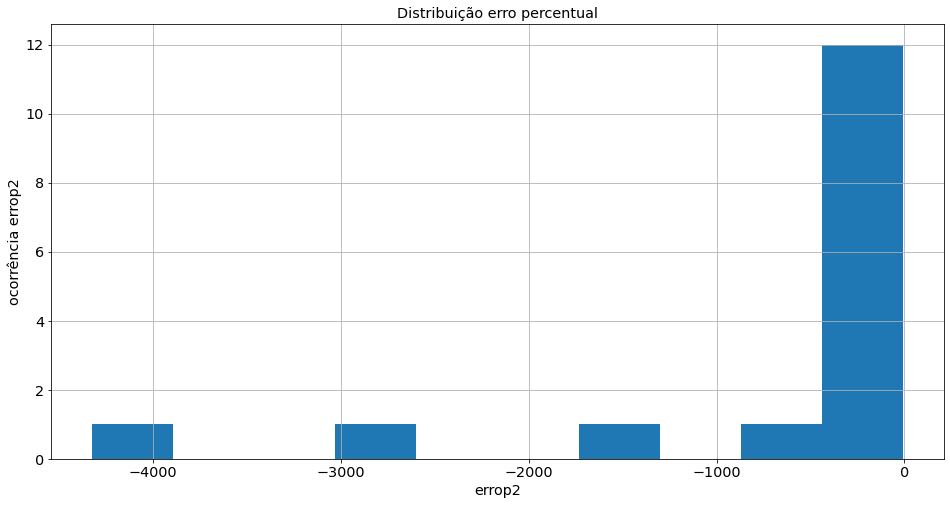

In [69]:
errop2.hist()
plt.title("Distribuição erro percentual")
plt.xlabel("errop2")
plt.ylabel("ocorrência errop2")
plt.show()

### XGBoosting

In [70]:
print(random_search_xgb.best_estimator_)

XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning rate=0.3, learning_rate=0.001, max depth=10,
             max_delta_step=0, max_depth=1, min_child_weight=1,
             min_child_weigth=7, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [71]:
from xgboost import XGBRegressor
m_xgb_1= XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0.01, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.001,
             max_delta_step=0, max_depth=11, min_child_weight=1,
             missing=0.001, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [72]:
m_xgb_1.fit(X_train,y_train)

[19:34:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0.01, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.001, max_delta_step=0, max_depth=11,
             min_child_weight=1, missing=0.001, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [73]:
y_xgb_1= m_xgb_1.predict(X_test)

In [74]:
mse_xgb_1 = round(mean_squared_error(y_test, y_xgb_1),3)
print (mse_xgb_1)

256341929403.75


In [75]:
errop2= (y_test - y_xgb_1)*100/y_test
# em porcentagem

In [76]:
# novo erro: modelo simples, com a média do conjunto treino
mse_m = mean_squared_error(y_test,a)
# comparativo entre o modelo tree e o modelo simples
r_xgb_1 = mse_xgb_1/mse_m
print(round(mse_m,3), round(mse_xgb_1,3))
print(round(r_xgb_1,3))

414542961978.675 256341929403.75
0.618


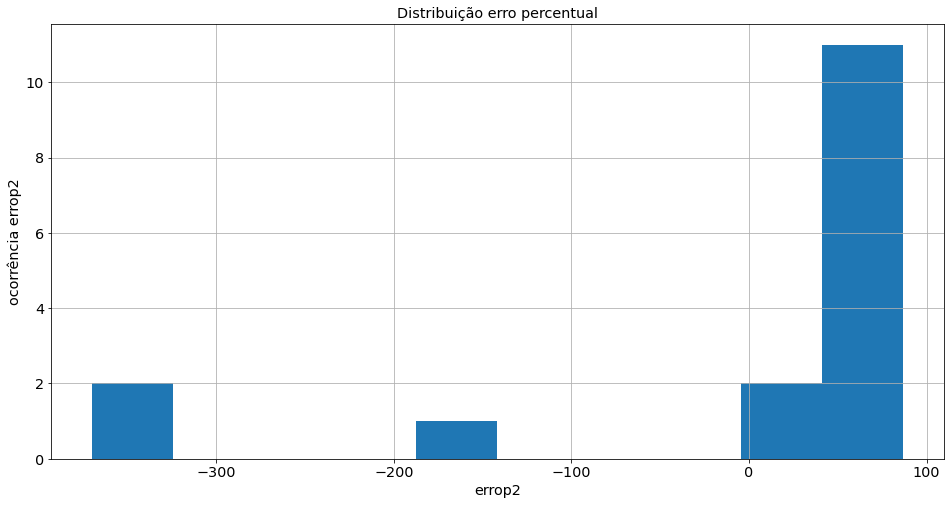

In [77]:
errop2.hist()
plt.title("Distribuição erro percentual")
plt.xlabel("errop2")
plt.ylabel("ocorrência errop2")
plt.show()

### Adaptative Boosting

In [78]:
print(random_search_ada.best_estimator_)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1),
                  learning_rate=0.15)


In [79]:
m_ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=1,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=0.1, loss='linear', n_estimators=40,
                  random_state=None)

In [80]:
m_ada.fit(X_train,y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\tree\_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\tree\_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\tree\_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\tree\_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can 

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1,
                                                       presort=False),
                  learning_rate=0.1, n_estimators=40)

In [81]:
y_ada = m_ada.predict(X_test)

In [82]:
mse_ada = round(mean_squared_error(y_test, y_ada),8)
print (mse_ada)

222661200735.89255


In [83]:
errop2= (y_test - y_ada)*100/y_test
# em porcentagem

In [84]:
# novo erro: modelo simples, com a média do conjunto treino
mse_m = mean_squared_error(y_test,a)
# comparativo entre o modelo tree e o modelo simples
r_ada = mse_ada/mse_m
print(round(mse_m,3), round(mse_ada,3))
print(round(r_ada,3))

414542961978.675 222661200735.893
0.537


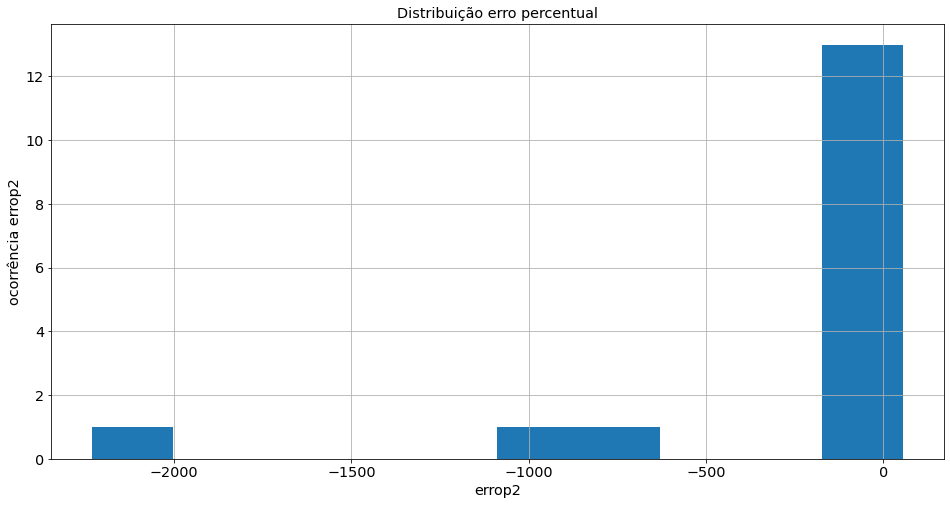

In [85]:
errop2.hist()
plt.title("Distribuição erro percentual")
plt.xlabel("errop2")
plt.ylabel("ocorrência errop2")
plt.show()

In [86]:
# erro quadrático médio entre média do treino e previsto

models=['Random_Forest','GradientBoost','LightGBM','XGBoost_1','AdaBoost']
mse=[mse_rf,mse_gbr,mse_lgb,mse_xgb_1,mse_ada]
r=[r_rf,r_gbr,r_lgb,r_xgb_1,r_ada]

lista = list(zip(mse,r))
d = pd.DataFrame(lista, columns =['Mean Square Error (Geotérmica)', 'Razão_modelo_simples'], index=models)
d

,Mean Square Error (Geotérmica),Razão_modelo_simples
Random_Forest,5.583494e+11,1.346903
GradientBoost,1.319885e+12,3.183952
LightGBM,1.303984e+12,3.145595
XGBoost_1,2.563419e+11,0.618372
AdaBoost,2.226612e+11,0.537125


### Predição dados Brasil

In [87]:
inputb = pd.read_excel(r'Xb.xlsx', header=0)
inputb.head(2)

,pibe_capita,pibe_area,pope_areae,pibe_GWe,GWe_pope
0,321.390342,0.001474,0.000005,0.015955,20143.929585
1,1069.041751,0.213696,0.000200,0.015767,67803.481941


In [88]:
inputb = inputb.rename(columns = {'pibe_area':'pibe_areae'}, inplace = False)
inputb.head(2)

,pibe_capita,pibe_areae,pope_areae,pibe_GWe,GWe_pope
0,321.390342,0.001474,0.000005,0.015955,20143.929585
1,1069.041751,0.213696,0.000200,0.015767,67803.481941


In [89]:
y_xgb_1= m_xgb_1.predict(X_test)
y_xgb_1

array([214136.8 , 187753.1 , 189361.47, 195648.69, 260971.22, 201745.14,
       206743.28, 212504.39, 224175.75, 220575.36, 194339.42, 196054.9 ,
       167455.19, 202214.66, 174961.16, 254904.77], dtype=float32)

In [90]:
y_xgb_1= m_xgb_1.predict(inputb)
y_xgb_1

array([8.0337232e+07, 2.6895018e+08, 7.0015690e+06, 5.9741125e+06,
       6.3501844e+07, 1.7485294e+08, 2.8969952e+07, 4.3004132e+07,
       3.5023470e+06, 5.0428340e+06, 8.6639896e+07, 4.1196656e+07,
       6.1896122e+08, 4.7913210e+06, 3.7806634e+08, 2.3111794e+07,
       7.9822842e+08, 6.1680664e+07, 8.8052984e+07, 1.8913384e+06,
       2.5286552e+07, 1.4528912e+08, 3.5669920e+08, 8.5496973e+08,
       4.5152975e+06], dtype=float32)

In [91]:
pred_geoter = pd.DataFrame({'y_xgb_1': y_xgb_1}, columns=['y_xgb_1'])

pred_geoter = pred_geoter.rename(columns = {'y_xgb_1':'Geotérmica'}, inplace = False)
pred_geoter.head()

,Geotérmica
0,80337232.0
1,268950176.0
2,7001569.0
3,5974112.5
4,63501844.0


In [92]:
br = pd.read_excel(r'Brasil_dataset_mestre.xlsx')
br=br.drop(columns=['PIB em 2017 (1.000.000 R$)','Área (km2)','Geração de energia GW.h','População'])
br = br.rename({'Unidades da Federação': 'Estado'}, axis = 1)
br = pd.DataFrame(data=br)
br.head(2)

,Estado
0,Acre
1,Alagoas


In [96]:
prev_GWh = pd.concat([br,pred_geoter['Geotérmica']], axis=1, sort=False)
prev_GWh = prev_GWh.sort_values(by=['Geotérmica'], ascending=False)
prev_GWh.head(10)

,Estado,Geotérmica
23,Santa Catarina,854969728.0
16,Pernambuco,798228416.0
12,Minas Gerais,618961216.0
14,Paraíba,378066336.0
22,Roraima,356699200.0
1,Alagoas,268950176.0
5,Ceará,174852944.0
21,Rondônia,145289120.0
18,Rio de Janeiro,88052984.0
10,Mato Grosso,86639896.0


In [99]:
# Previsões (GW.h) para o Brasil de Energia Geotérmica
fig = px.histogram(prev_GWh, y="Estado", x='Geotérmica', color="Estado",
                   title="Previsões (GW.h) para o Brasil de Energia Geotérmica")
fig.show()

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribuição Energia Geotérmica com previsão dos Coeficientes de Arvores')

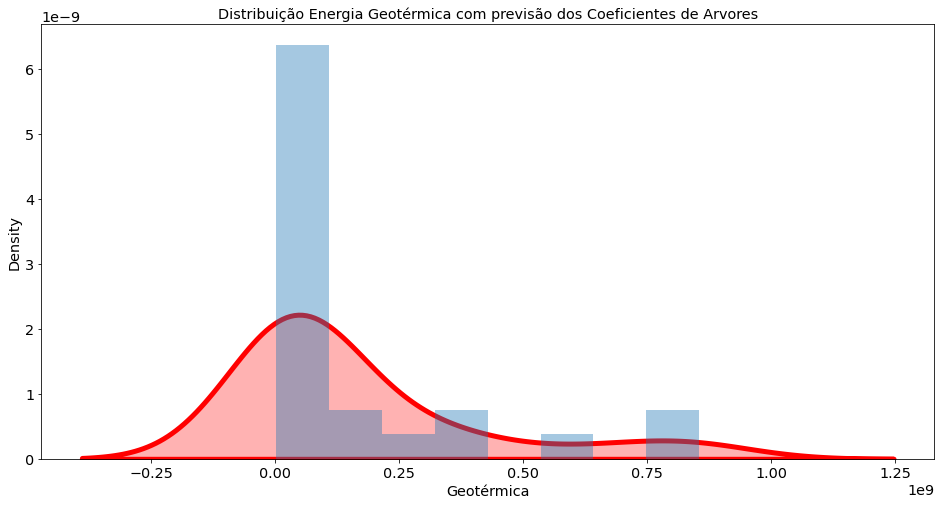

In [98]:
sns.distplot( a=prev_GWh["Geotérmica"], kde=True,
kde_kws={"color": "r", "alpha":0.3, "linewidth": 5, "shade":True })
plt.title("Distribuição Energia Geotérmica com previsão dos Coeficientes de Arvores")

# ÁRVORE DE DECISÃO

In [15]:
import matplotlib.pylab as plz
import matplotlib.pyplot as plt
import sys
import warnings
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.model_selection import train_test_split
from io import StringIO

import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix, precision_recall_curve

sns.set()

In [16]:
dfe.head(2)

,State,pibe_capita,pibe_areae,pope_areae,pibe_GWe,GWe_pope,solar_e,eole,bioSe,geoe,hyde
0,Alabama,0.046529,1.739276,37.380099,0.001599,29.099337,3.758165e+06,2.830225e+02,11193.4559,535489.50344,4102.565755
1,Alaska,0.074343,0.113787,1.530579,0.008958,8.298660,8.283142e+06,1.373433e+06,513.4767,15437.26876,23675.571931


In [ ]:
#X = dfe.drop(columns=['solar_e','eole','bioSe','geoe','hyde','State'])
#ysol = dfe.loc[:,'solar_e']
#yeol = dfe.loc[:,'eole']
#ybio = dfe.loc[:,'bioSe']
#ygeo = dfe.loc[:,'geoe']
#yhyd = dfe.loc[:,'hyde']

In [17]:
X = dfe.drop(columns=['State','geoe','pibe_capita','pibe_areae','pope_areae','pibe_GWe','GWe_pope'])
ygeo = dfe.loc[:,'geoe']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, ygeo, test_size =0.3, random_state=1234)

dtr = DecisionTreeRegressor(max_depth=4)
dtr.fit(X_train,y_train)
yhat = dtr.predict(X_test)
r2 = metrics.r2_score(y_test,yhat)
mse = metrics.mean_squared_error(y_test,yhat)

print(f'r2: {round(r2,4)}, mse:{round(mse,4)}')

r2: -0.4921, mse:235919487844.277


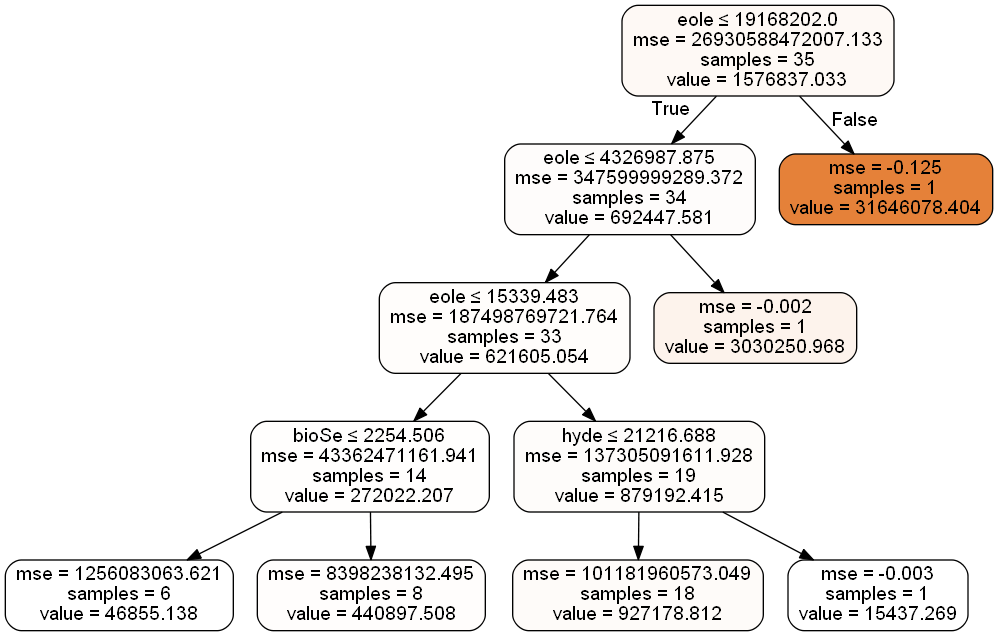

In [19]:
dot_data = StringIO()
export_graphviz(dtr,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=list(X))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())